In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Multidimentional Regression
def mul_reg(df):
    X = df[df.columns[:len(df.columns)-1]]
    y = df[df.columns[-1:]]
    X= X.to_numpy()
    y= y.to_numpy()
    ones = np.ones((X.shape[0],X.shape[1]+1))
    ones[:,1:]=X
    X=ones
    
    beta_hat = (np.linalg.inv(X.T@X))@(X.T@y)

    return beta_hat

In [3]:
hyades_df = pd.read_fwf("Hyades_star.dat")
m45_df = pd.read_csv("M45.csv")
tuc47_df = pd.read_csv("47Tuc.csv")
pleiades_df = pd.read_csv("pleiadesdata.csv")

In [4]:
hyades_df.drop(columns=["HIP","RA","DE","Plx","pmRA","pmDE","e_Plx"],inplace=True)
m45_df.drop(columns=["Star number"],inplace=True)
tuc47_df.drop(columns=["Star Number"],inplace=True)
pleiades_df.drop(columns=["Star number","B Mag"],inplace=True)

In [5]:
hyades_df.dropna(inplace=True)
m45_df.rename(columns={"Color(B-V)":"B-V","Magnitude":"Vmag"},inplace=True)
tuc47_df.rename(columns={"Color(B-V)":"B-V","Magnitude":"Vmag"},inplace=True)
pleiades_df.rename(columns={"CI =B-V":"B-V","V mag (m)":"Vmag"},inplace=True)

In [6]:
#Assuming all data is in terms of apparent magnitude
hyades_df = hyades_df[["B-V","Vmag"]]
m45_df = m45_df[["B-V","Vmag"]]
tuc47_df = tuc47_df[["B-V","Vmag"]]
pleiades_df = pleiades_df[["B-V","Vmag"]]

In [7]:
#Assuming distance from Earth to Hyades is 46.34pc
#M = m - 5*log(46.34/10)

hyades_df["M"] = hyades_df.loc[:]["Vmag"]-3.329780147
hyades_df.drop(columns=["Vmag"],inplace=True)
hyades_df.head()

,B-V,M
0,0.999,5.94022
1,0.778,5.32022
2,1.150,7.45022
3,1.030,7.24022
4,1.068,6.60022


In [8]:
def abline(slope,intercept,label=None,color='r'):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals,color=color,label=label)

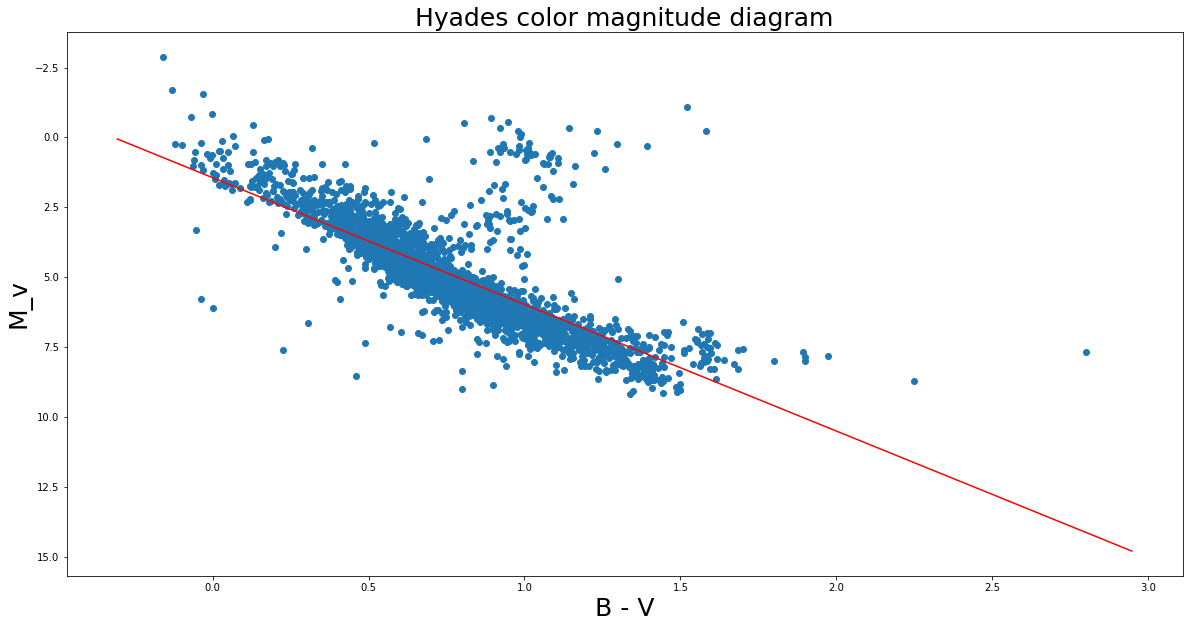

In [9]:
plt.rcParams['figure.figsize'] = [20,10]
X = hyades_df["B-V"]
Y = hyades_df["M"]
plt.scatter(X,Y)
params = mul_reg(hyades_df)
abline(params[1],params[0])
plt.gca().invert_yaxis()
plt.title("Hyades color magnitude diagram", fontsize=25)
plt.xlabel("B - V", fontsize=25)
plt.ylabel("M_v", fontsize=25)
plt.show()

In [10]:
#There is significant deviation of the best fit line due to outliers

In [11]:
def distance(m,c,x,y):
    return (abs(m*x-y+c))

In [12]:
#outlier removal
def outliers(cluster_df,threshold=1):
    for i in range(10):
        params = mul_reg(cluster_df)
        m = float(params[1])
        c = float(params[0])
        outliers = []
        for j in cluster_df.index:
            x = cluster_df.loc[j]["B-V"]
            if len(cluster_df)>100:
                y = cluster_df.loc[j]["M"]
            else:
                y = cluster_df.loc[j]["Vmag"] 
            if distance(m,c,x,y)>threshold:
                outliers.append(j)
        cluster_df.drop(index=outliers,inplace=True)

In [13]:
#Now that major outliers have been removed we can perform Main Sequnce Fitting
def msf(cluster_df,cluster_name,threshold):
    outliers(hyades_df)
    plt.rcParams['figure.figsize'] = [20,10]
    plt.scatter(hyades_df["B-V"],hyades_df["M"])
    params_std = mul_reg(hyades_df)
    abline(float(params_std[1]),float(params_std[0]),"Hyades")
    plt.gca().invert_yaxis()
    plt.title(cluster_name+" Main Sequence Fitting", fontsize=25)
    plt.xlabel("B - V", fontsize=25)
    plt.ylabel("M_v", fontsize=25)
    outliers(cluster_df,threshold)
    plt.scatter(cluster_df["B-V"],cluster_df["Vmag"])
    params = mul_reg(cluster_df)
    abline(float(params[1]),float(params[0]),cluster_name,'g')
    plt.legend(fontsize=15)
    plt.show()
    offset = float(params[0])-float(params_std[0])
    distance = 10*(10**(offset/5))
    print("Intercept of best fit line of Hyades =",float(params_std[0]))
    print("Intercept of best fit line of "+cluster_name+" = ",float(params[0]))
    print("Offset = ",offset)
    print("Distance = ",distance,"pc")

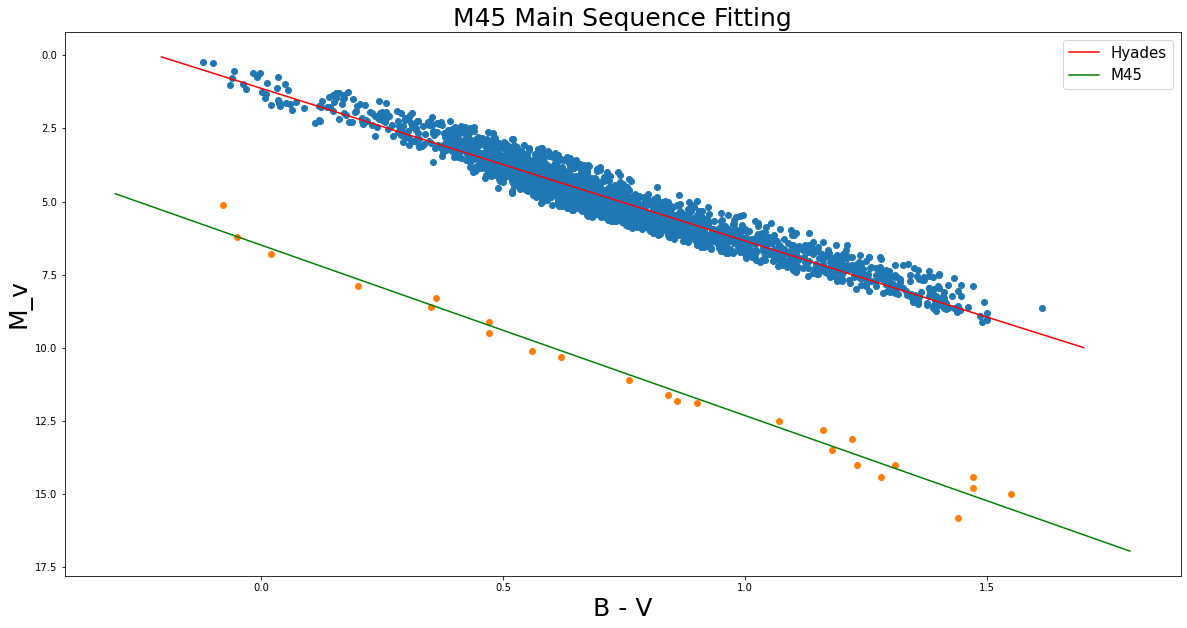

Intercept of best fit line of Hyades = 1.132405562559427
Intercept of best fit line of M45 =  6.490377696572921
Offset =  5.357972134013494
Distance =  117.92188879217186 pc


In [14]:
msf(m45_df,"M45",1)

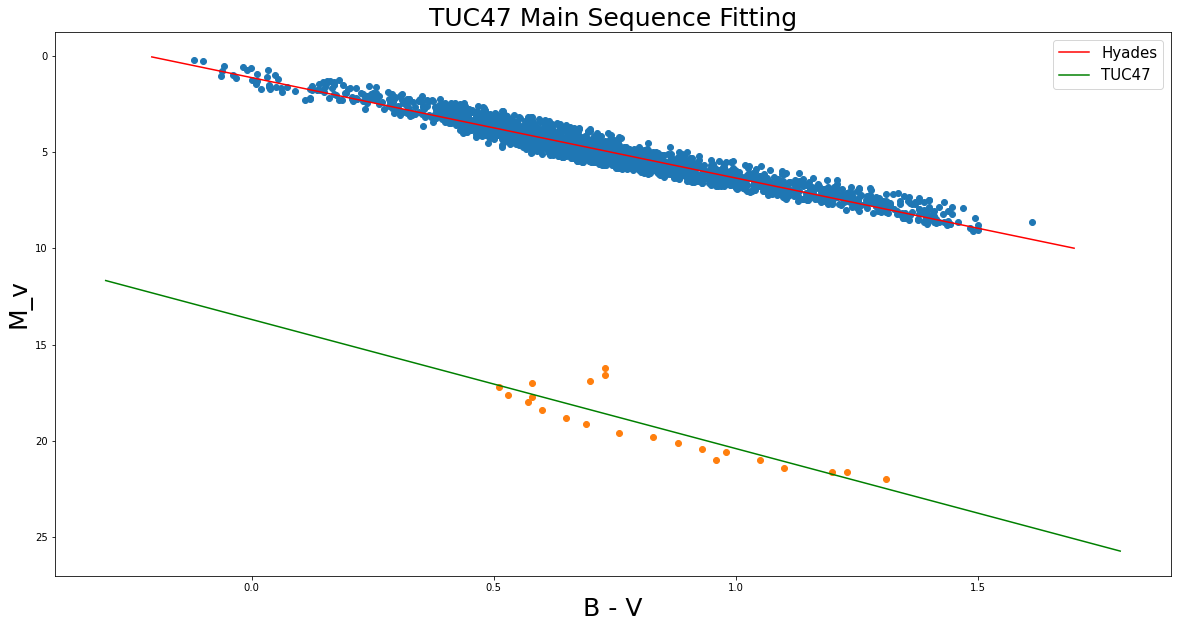

Intercept of best fit line of Hyades = 1.132405562559427
Intercept of best fit line of TUC47 =  13.695140088912439
Offset =  12.562734526353012
Distance =  3254.969363679866 pc


In [15]:
msf(tuc47_df,"TUC47",3)

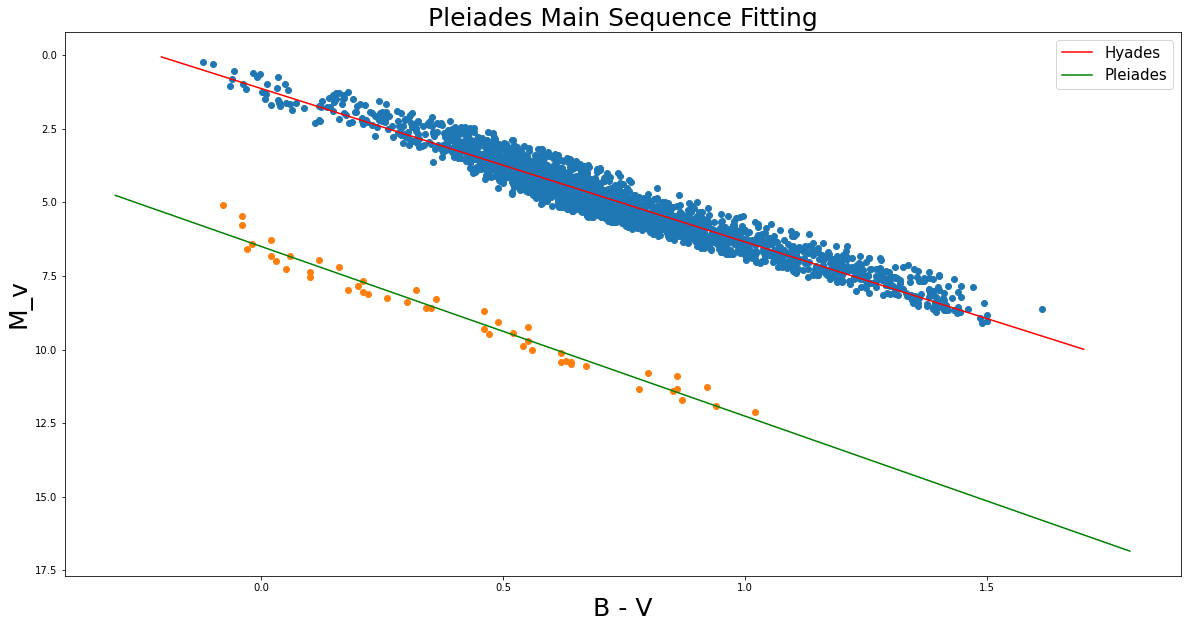

Intercept of best fit line of Hyades = 1.132405562559427
Intercept of best fit line of Pleiades =  6.500417373032295
Offset =  5.3680118104728685
Distance =  118.46835609675226 pc


In [16]:
msf(pleiades_df,"Pleiades",1)